# CSE-6363 Homework-3

### Team Members:
1. Nikhil Reddy Duggireddy  -1001968033
2. Laya Kalali              -1002128876
3. Sasikala Paturu          -1002083123
4. Lokeshwar Kodipunjula    -1002175121

## Link to the Google Colab

https://colab.research.google.com/drive/1Xu6XfyGEpQozQAHH0v40eHsVzFBaI37g#scrollTo=gfoZ63flQelJ

### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf


### Load and Preprocess CIFAR-10 Dataset

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize to target shape for ResNet50 input (64x64 images -> for lower memory usage)
# Use method='bilinear' and antialias=True for better quality resizing
x_train_resized = tf.image.resize(x_train, [32, 32], method='bilinear', antialias=True)
x_test_resized = tf.image.resize(x_test, [32, 32], method='bilinear', antialias=True)


# Preprocess images for ResNet50
x_train_resized = tf.keras.applications.resnet.preprocess_input(x_train_resized)
x_test_resized = tf.keras.applications.resnet.preprocess_input(x_test_resized)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Feature Extraction with Pre-Trained CNN (ResNet50)

In [3]:
# Load ResNet50 model without the top layer for feature extraction
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

# Extract features for training images
train_features = model.predict(x_train_resized, batch_size=32)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten to 1D

# Extract features for test images
test_features = model.predict(x_test_resized, batch_size=32)
test_features = test_features.reshape(test_features.shape[0], -1)  # Flatten to 1D


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


### Implementing Image Retrieval Using Nearest Neighbors

In [5]:
# Fit Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, metric='cosine')
neighbors.fit(train_features)

# Define a function to retrieve similar images
def retrieve_similar_images(query_index):
    query_feature = test_features[query_index].reshape(1, -1)
    distances, indices = neighbors.kneighbors(query_feature)

    # Plot the query image
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 6, 1)
    plt.imshow(x_test[query_index])
    plt.title("Query Image")
    plt.axis('off')

    # Plot the retrieved images
    for i, idx in enumerate(indices[0]):
        plt.subplot(1, 6, i + 2)
        plt.imshow(x_train[idx])
        plt.title(f"Match {i + 1}")
        plt.axis('off')
    plt.show()


### Test the Image Retrieval System

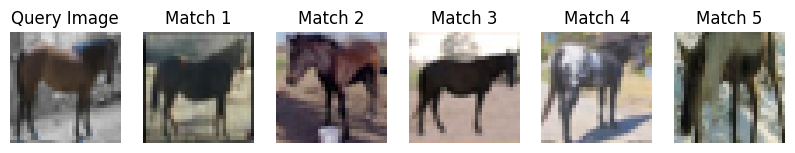

In [11]:
# Test retrieval for a random test image
query_index = np.random.randint(0, len(x_test))
retrieve_similar_images(query_index)
